<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise_11_7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7- analogous to task 2, but using same 3 models as in Task 6.

In [10]:
%%capture
!pip install nilearn

In [11]:
%%capture
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib

In [12]:
%%capture
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_decomposition import PLSRegression as PLSR
from sklearn.cross_decomposition import CCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression as LR

In [13]:
%%capture
from IPython import display
display.set_matplotlib_formats('svg')

In [14]:
# We predefine the models 
plsr    = PLSR(n_components=3,  scale=False)
cca     = CCA(n_components=2,  scale=False) 
pca    = PCA(n_components=3)
lr        = LR()

# We predefine the objects
scaler  = StandardScaler()
cv   = KFold(n_splits = 5, shuffle = True, random_state = 666)

# We create one pipeline for each model
pipe1 = make_pipeline(scaler, plsr)
pipe2 = make_pipeline(scaler, pca, lr)
pipe3 = make_pipeline(scaler, cca)

In [15]:
# We define the iterating variable (versions) 
versions = list(range(1,43))

# We pre-allocate the variables where we will append the scores
score1_1 = []
score2_1 = []
score3_1 = []
score1_2 = []
score2_2 = []
score3_2 = []

In [7]:
%%capture
for r in versions:
  brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
  crad = datasets.fetch_atlas_craddock_2012()
  atlas_nii = index_img(crad['scorr_mean'], (r)) # this needs to be modified for some tasks
  masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
  input_variables = masker.fit_transform(brain_data.gray_matter_maps)
  output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] # gives subject age on standard units after z-scoring

  X, y = input_variables, output_variable              # We reinstate X, y at the start of the loop in order to reset their values

  for train_index, test_index in cv.split(X, y):
      X_train, y_train = X[train_index], y[train_index]
      X_test, y_test = X[test_index], y[test_index]

      plsr_model = pipe1.fit(X_train, y_train)                       # We define the plsr model
      score1 = plsr_model.score(X_train, y_train)             # We calculate the coefficient of determination for the train data
      score1_1.append(score1)                                             # We store the scores
      score2 = plsr_model.score(X_test, y_test)              # We calculate the coefficient of determination for the test data
      score1_2.append(score2)                                           # We store the scores

      plr_model = pipe2.fit(X_train, y_train)                         # We define the plr model
      score3 = plr_model.score(X_train, y_train)               # We calculate the coefficient of determination for the train data
      score2_1.append(score3)                                             # We store the scores
      score4 = plr_model.score(X_test, y_test)                # We calculate the coefficient of determination for the test data
      score2_2.append(score4)                                           # We store the scores

      cca_model = pipe3.fit(X_train, y_train)                       # We define the cca model
      score5 = cca_model.score(X_train, y_train)             # We calculate the coefficient of determination for the train data
      score3_1.append(score5)                                             # We store the scores
      score6 = cca_model.score(X_test, y_test)              # We calculate the coefficient of determination for the test data
      score3_2.append(score6)                                           # We store the scores

In [8]:
# We convert the output lists into np.arrays and we average by every 5 elements 
plsr_train = np.array(score1_1)
plsr_train = np.average(plsr_train.reshape(-1, 5), axis=1)
plsr_test = np.array(score1_2)
plsr_test = np.average(plsr_test.reshape(-1, 5), axis=1)

pcr_train = np.array(score2_1)
pcr_train = np.average(pcr_train.reshape(-1, 5), axis=1)
pcr_test = np.array(score2_2)
pcr_test = np.average(pcr_test.reshape(-1, 5), axis=1)

cca_train = np.array(score3_1)
cca_train = np.average(cca_train.reshape(-1, 5), axis=1)
cca_test = np.array(score3_2)
cca_test = np.average(cca_test.reshape(-1, 5), axis=1)

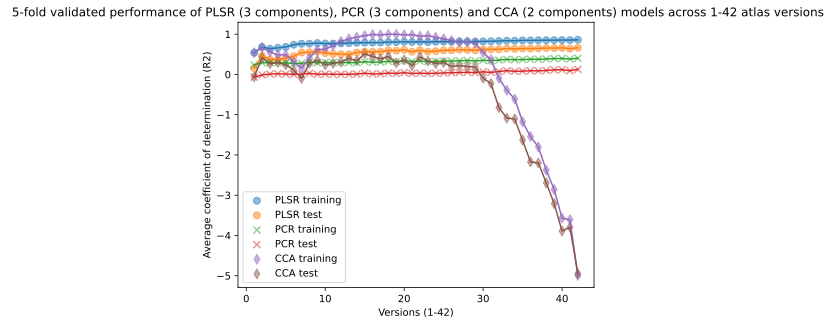

In [9]:
# We're ready to plot
lab = ['PLSR training', 'PLSR test', 'PCR training', 'PCR test', 'CCA training', 'CCA test']
plt.style.use("default")
plt.scatter(versions,plsr_train, s=50, alpha = 0.5, marker = 'o')
plt.scatter(versions,plsr_test, s=50, alpha = 0.5, marker = 'o')
plt.scatter(versions,pcr_train, s=50, alpha = 0.5, marker = 'x')
plt.scatter(versions,pcr_test, s=50, alpha = 0.5, marker = 'x')
plt.scatter(versions,cca_train, s=50, alpha = 0.5, marker = 'd')
plt.scatter(versions,cca_test, s=50, alpha = 0.5, marker = 'd')
plt.legend(labels=(lab))
plt.gca().set(
    title=" 5-fold validated performance of PLSR (3 components), PCR (3 components) and CCA (2 components) models across 1-42 atlas versions",
    xlabel="Versions (1-42)",
    ylabel="Average coefficient of determination (R2) of the training and test splits",
)
plt.plot(versions,plsr_train)
plt.plot(versions,plsr_test)
plt.plot(versions,pcr_train)
plt.plot(versions,pcr_test)
plt.plot(versions,cca_train)
plt.plot(versions,cca_test)
plt.show()